https://datacorner.fr/image-processing-4/?_ga=2.124168138.1980716635.1704996363-1926476272.1704996363&_gl=1*xx5bw*_ga*MTkyNjQ3NjI3Mi4xNzA0OTk2MzYz*_ga_RXP3T9KBWC*MTcwNTA2NzEzNC4zLjAuMTcwNTA2NzEzNC4wLjAuMA..

In [2]:
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage import exposure, transform, morphology, data
from skimage.color import rgb2gray
import numpy as np
from skimage.filters import threshold_mean, threshold_otsu
import pandas as pd
import math
from matplotlib.pyplot import imshow, get_cmap
from skimage.morphology import binary_dilation, disk
from scipy import signal

c:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


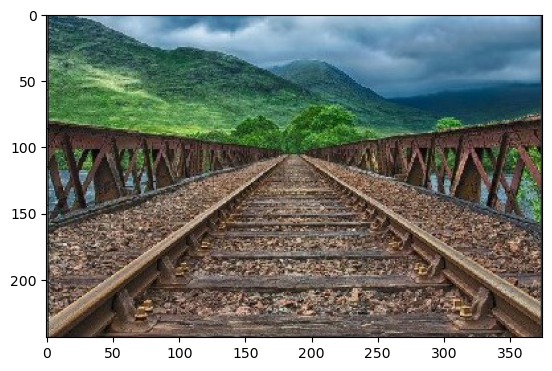

In [3]:
image1 = imread('railway.jpg') #, as_gray=True)
plt.imshow(image1)

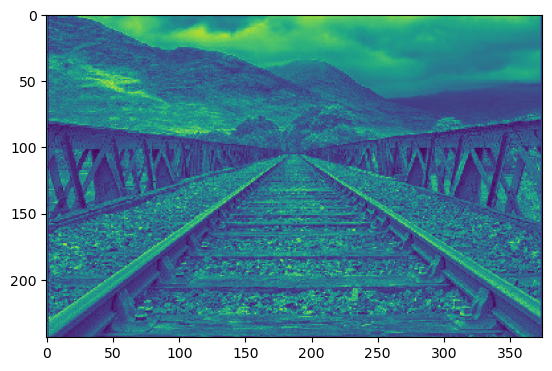

In [4]:
image1_Gray = imread('railway.jpg', as_gray=True)
plt.imshow(image1_Gray)

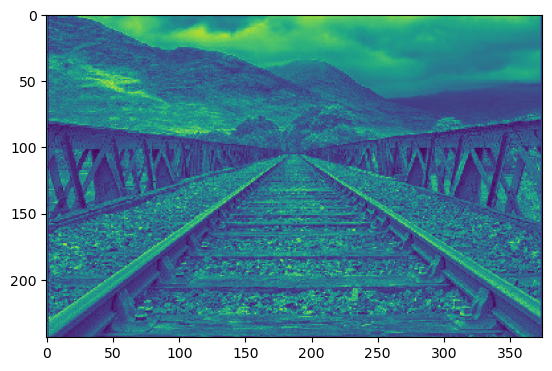

In [5]:
image1_Gray = rgb2gray(image1)
plt.imshow(image1_Gray)

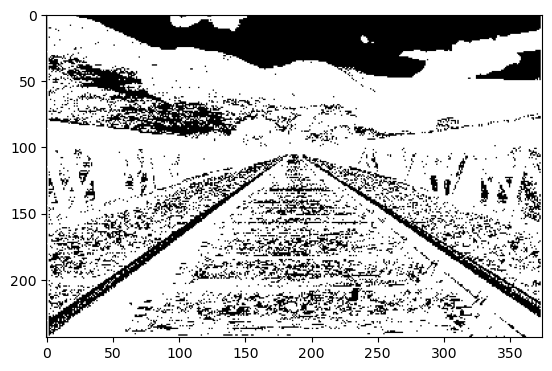

In [6]:
im = np.where(image1_Gray>128/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

# Histogrammes avec scikit-image

Avec scikit-image nous utiliserons simplement la fonction histogram pour tracer ces graphes :

In [7]:
def imageHist(image):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    if (image.ndim == 2):
        # Grascale Image
        axis[0].imshow(image, cmap=plt.get_cmap('gray'))
        axis[1].set_title('Histogram')
        axis[0].set_title('Grayscale Image')
        hist = exposure.histogram(image)
        axis[1].plot(hist[0])
    else:
        # Color image
        axis[0].imshow(image, cmap='gray')
        axis[1].set_title('Histogram')
        axis[0].set_title('Colored Image')
        rgbcolors = ['red', 'green', 'blue']
        for i, mycolor in enumerate(rgbcolors):
            axis[1].plot(exposure.histogram(image[...,i])[0], color=mycolor)

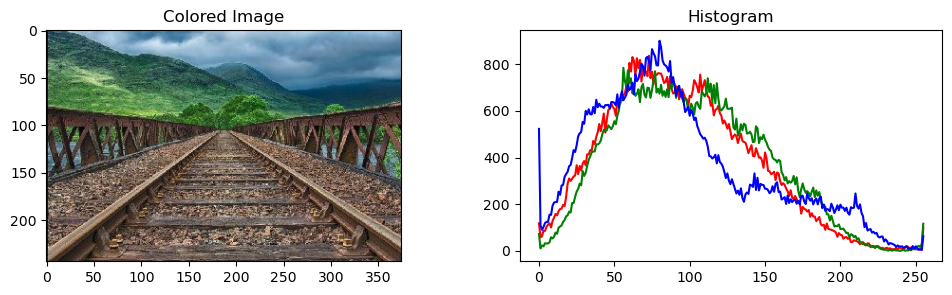

In [8]:
imageHist(image1)

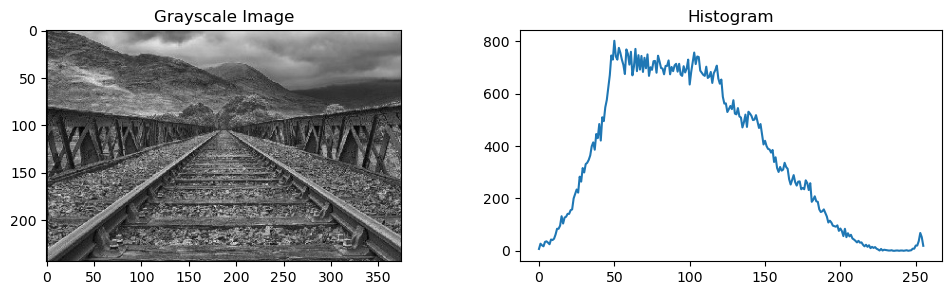

In [9]:
imageHist(image1_Gray)

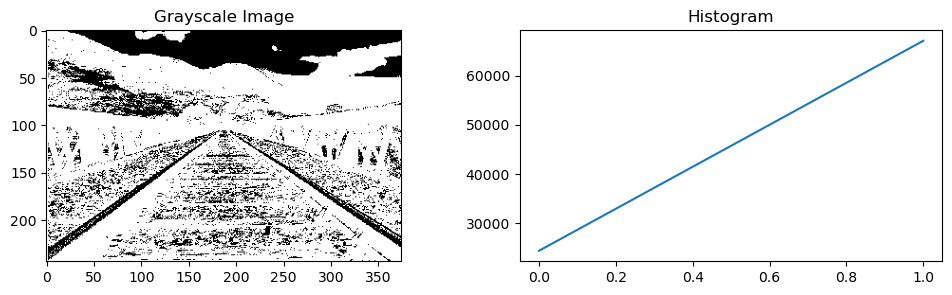

In [10]:
imageHist(im)

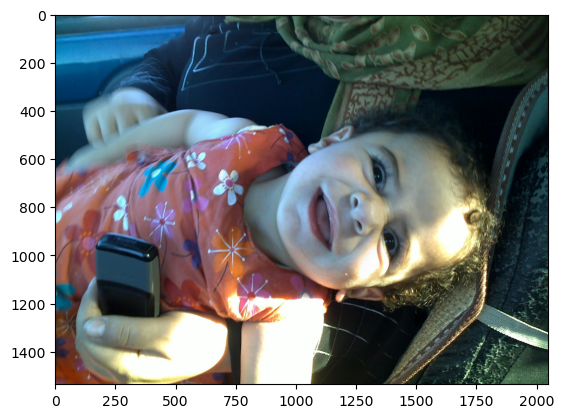

In [11]:
img = imread('25072010030.jpg') 
plt.imshow(img)

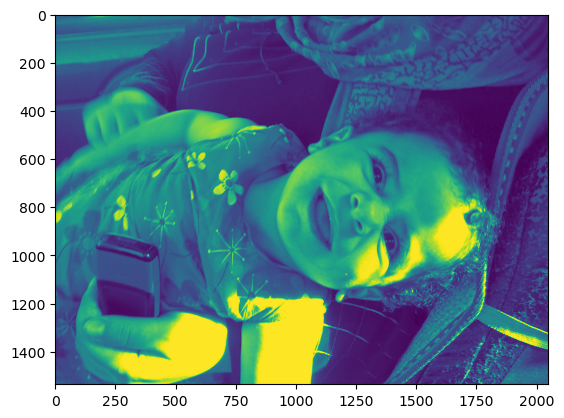

In [12]:
img_Gray = rgb2gray(img)
plt.imshow(img_Gray)

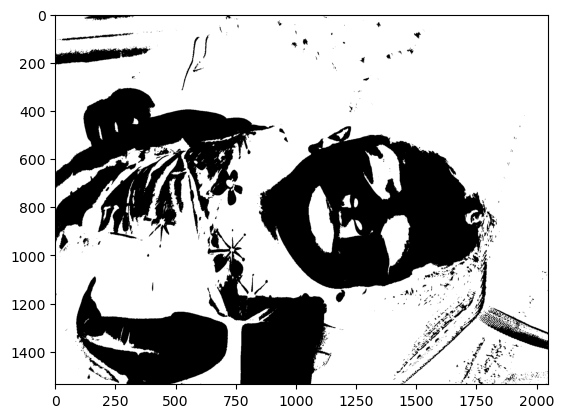

In [13]:
im = np.where(img_Gray>120/256, 0, 1)
imshow(im, cmap=plt.get_cmap('gray'))

# Histogrammes avec OpenCV
Avec OpenCV c’est tout aussi simple et c’est en plus beaucoup plus rapide en temps de traitement. 
Voici comment visualiser l’histogramme d’une image couleur :

In [14]:
def histogramOpenCV(_img):
    _, axis = plt.subplots(ncols=2, figsize=(12, 3))
    axis[0].imshow(_img)
    axis[1].set_title('Histogram')
    axis[0].set_title('Image')
    rgbcolors = ['red', 'green', 'blue']
    for i,col in enumerate(color):
        histr = cv.calcHist([_img],[i],None,[256],[0,256])
        axis[1].plot(histr,color = col)

# Traitement d’images (partie 3: Seuillage d’image)

# Retouche d’une image en niveau de gris

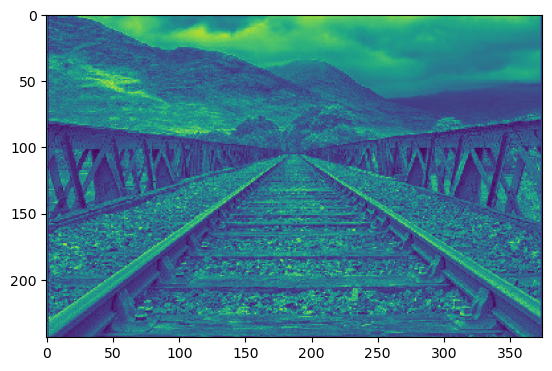

In [15]:
image1_Gray = imread('railway.jpg', as_gray=True)
plt.imshow(image1_Gray)

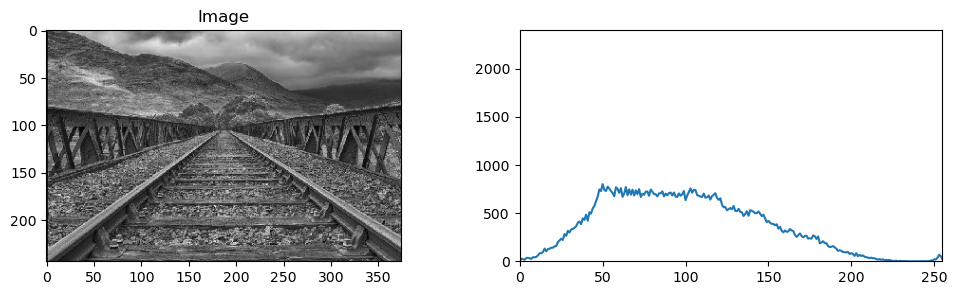

In [16]:
def histGrayScale(img, _xlim=255, _ylim=2400):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    ax = axes.ravel()
    ax[0].imshow(img, cmap=plt.get_cmap('gray'))
    ax[0].set_title('Image')
    hist = exposure.histogram(img)
    ax[1].plot(hist[0])
    # to provide a better display we just change the plot display
    ax[1].set_xlim([0, _xlim])
    ax[1].set_ylim([0, _ylim])
histGrayScale(image1_Gray)

Dans cette image en niveau de gris on voit que la majorité des pixels ont une intensité de 50 à 120.

Forçons tous les pixels au dessus de 120 à 255 pour voir ce que cela donne. En Python c’est une opération (Numpy) très simple :

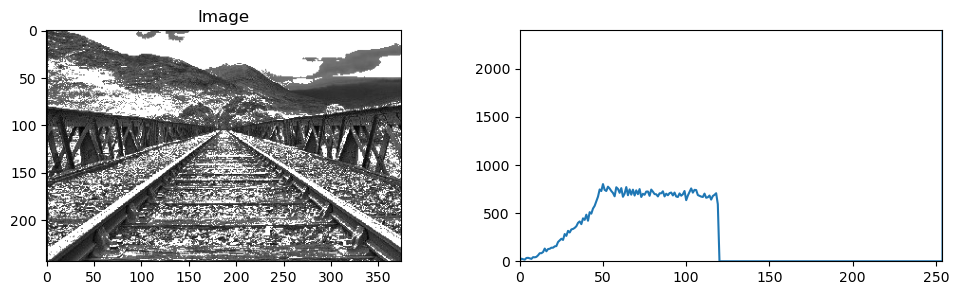

In [17]:
im = np.where(image1_Gray>120/256, 1, image1_Gray)
histGrayScale(im, 254, 2400)

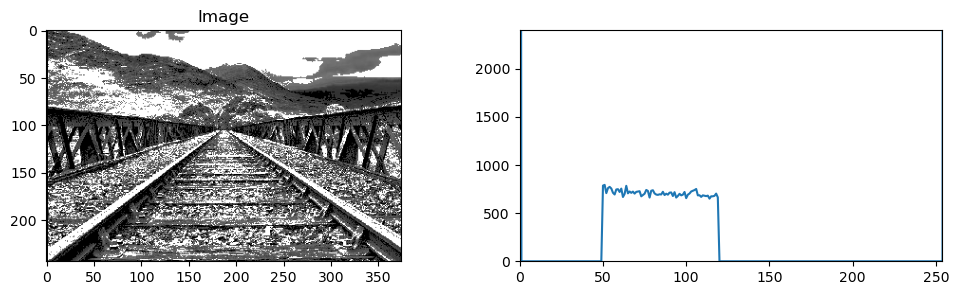

In [18]:
im = np.where(im<50/256, 0, im)
histGrayScale(im, 254, 2400)

# Récupérer les statistiques globales de l’image
On a vu l’importance des données présentées par nos histogrammes pour effectuer des seuillages. Les histogrammes apportent une compréhension globale de l’image mais comment déterminer nos seuils ? (comme ceux de 120 et 50 que nous avons utilisés précédemment). Quelques données statistiques comme la moyenne, la médiane et même pourquoi pas les quartiles pourraient être utiles. Voici une petite fonction Python qui nous affiche ces éléments :

In [19]:
def RGBStats(image): 
    colors = [] 
    for i in range(0, 3): 
        max_color =np.max(image[:,:,i]) 
        min_color =np.min(image[:,:,i]) 
        mean_color = np.mean(image[:,:,i]) 
        median_color = np.median(image[:,:,i]) 
        row = (min_color, max_color, mean_color, median_color)
        colors.append(row)
    return pd.DataFrame(colors,  
                        index = ['Red', ' Green', 'Blue'], 
                        columns = ['Min', 'Max', 'Mean', 'Median'])

RGBStats(image1)

Min  Max        Mean  Median
Red       0  255   93.765355    90.0
 Green    0  255  101.038077    98.0
Blue      0  255   92.365563    83.0

# Seuillage binaire sur la moyenne
Très souvent la technique de seuillage est utilisée pour créer une image Noir et Blanc: c’est ce que l’on appelle un seuillage binaire. Dans ces cas là il parait logique de se baser sur la moyenne des pixels. Tout ce qui est en dessous de la moyenne sera mis à 0 et tout ce qui sera au dessus à 1. La fonction skimage threshold_mean() le fait tout seul pour vous :

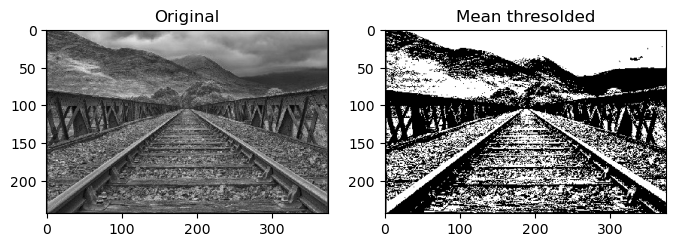

In [20]:
def thresholdMeanDisplay(image):
    thresh = threshold_mean(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Mean thresolded')
    
thresholdMeanDisplay(image1_Gray)

# Seuillage Otsu
Le seuillage Otsu est une technique calcul du seuil basée sur la forme de l’histogramme de l’image. Nous utiliserons la fonction skimage toute faite threshold_otsu().

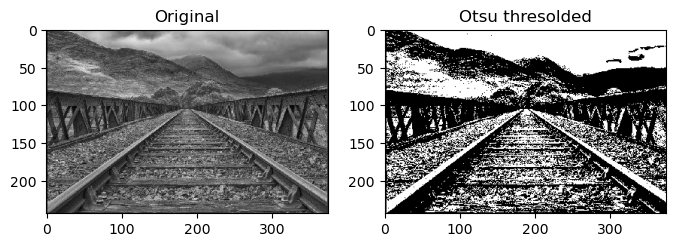

In [21]:
def thresholdOtsuDisplay(image):
    thresh = threshold_otsu(image)
    binary = image > thresh
    fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
    ax = axes.ravel()
    ax[0].imshow(image, cmap=plt.cm.gray)
    ax[0].set_title('Original')
    ax[1].imshow(binary, cmap=plt.cm.gray)
    ax[1].set_title('Otsu thresolded')
    
thresholdOtsuDisplay(image1_Gray)

# Seuillage des images en couleur

Pour les images en couleur, le principe de seuillage est le même mais à la différence près que l’on va faire cette opération par canaux (RGB).

Prennons un image en couleur, et regardons son histogramme :

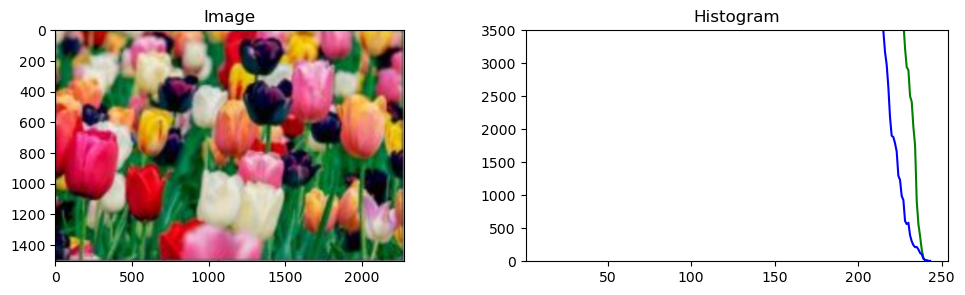

In [22]:
image1 = imread('tulipe1.png')
def histColor(img):
    _, axes = plt.subplots(ncols=2, figsize=(12, 3))
    axes[0].imshow(img)
    axes[0].set_title('Image')
    axes[1].set_title('Histogram')
    axes[1].plot(exposure.histogram(img[...,0])[0], color='red')
    axes[1].plot(exposure.histogram(img[...,1])[0], color='green')
    axes[1].plot(exposure.histogram(img[...,2])[0], color='blue')
    axes[1].set_xlim([1, 254])
    axes[1].set_ylim([0, 3500])
histColor(image1)

Et si on affichait les 3 canaux séparément :

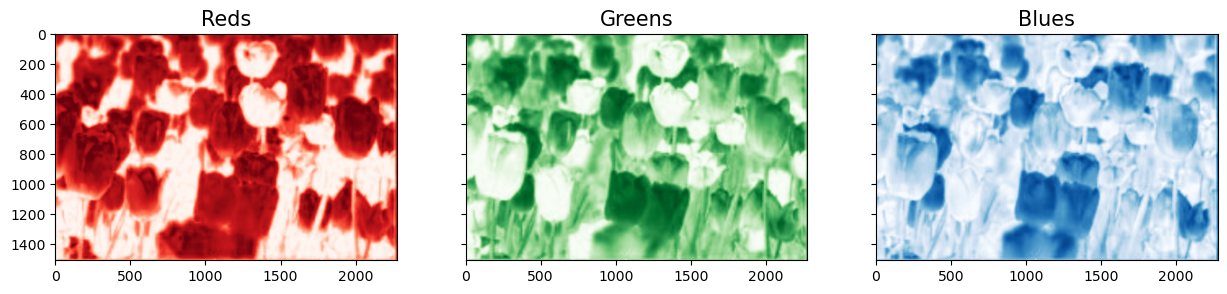

In [23]:
rgb = ['Reds','Greens','Blues'] 
_, axes = plt.subplots(1, 3, figsize=(15,5), sharey = True) 
for i in range(3): 
   axes[i].imshow(image1[:,:,i], cmap = rgb[i]) 
   axes[i].set_title(rgb[i], fontsize = 15)

Vous remarquerez la « vision en négatif » … regardez de plus près les tulipes au centres … elles sont blanches et apparaissent donc logiquement foncée sur les 3 canaux (le blanc étant la somme de toutes les couleurs).

Effectuons un seuillage sur le canal vert seulement en retirant les verts d’intensité inférieure à 150 :

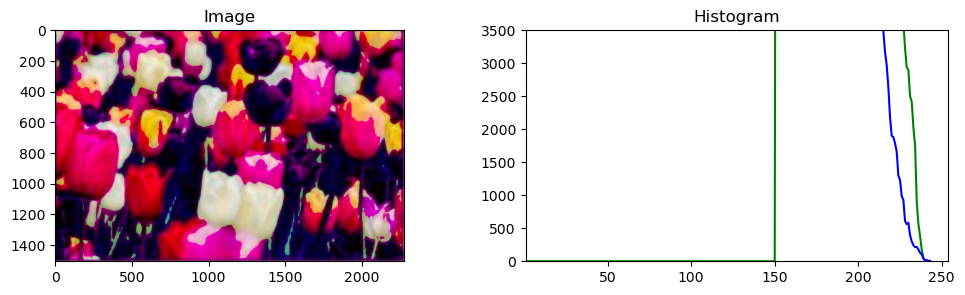

In [24]:
thresold_G = 150
image1_modified = image1.copy()
image1_modified[:,:,1] = np.where(image1[:,:,1]>thresold_G, 
                                  image1[:,:,1], 
                                  0)
histColor(image1_modified)

Voilà le résultat de l’image à qui on a supprimé une bonne partie de son canal vert les verts d’intensité faible en fait) 🙂

# Traitement d’images (partie 4: Transformations)

Avant de voir comment effectuer une rotation d’image simplement avec scikit-image. je vous invite à aller sur le site de skimage pour regarder toutes les transformations d’images que la bibliothèque propose. Il y en a un grand nombre et on n’en verra que certaines dans cet article bien sur. Commençons donc par la rotation.

Avant tout importons les bonnes librairies Python:

Ensuite créons un image ultra-simple (4 x 4) composées de pixels noir ou blanc, et affichons la avec la méthode imshow. Nous pourrions utiliser n’importe quel type d’image bien sur mais je trouve qu’un exemple très simple est plus parlant, surtout quand on montre les matrices résultat.

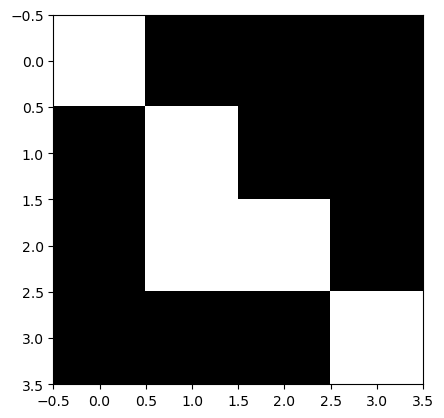

In [25]:
image_test = np.array([[1,0,0,0], [0,1,0,0], [0,1,1,0], [0,0,0,1]])
imshow(image_test, cmap=plt.get_cmap('gray'))

Un simple appel à la fonction transform.rotate() permet donc d’effectuer cette rotation sur l’angle voulu (ci-dessous 90°)

In [26]:
rotated = transform.rotate(image_test, angle=90, preserve_range=True)
print(rotated)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00]
 [0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.2246468e-16 1.0000000e+00 1.0000000e+00 0.0000000e+00]
 [1.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00]]


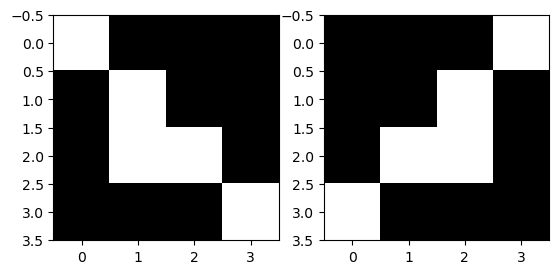

In [27]:
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(rotated, cmap=plt.get_cmap('gray'))

# Changement de taille

Changer la taille d’une image est bien sur une opération courante. Imaginons que l’on veuille augmenter la taille de notre image de 4×4 à 6×6. Nous utiliserons pour cela la fonction transform.resize() en lui passant en paramètre le tuple (6,6)

In [28]:
resized_img = transform.resize(image=image_test, output_shape=(6,6), preserve_range=True)

Regardons l’image résultante :

In [29]:
print(resized_img)

[[0.72222222 0.5        0.13888889 0.02777778 0.         0.        ]
 [0.5        0.5        0.41666667 0.08333333 0.         0.        ]
 [0.16666667 0.5        0.86111111 0.30555556 0.08333333 0.02777778]
 [0.16666667 0.5        0.97222222 0.86111111 0.41666667 0.13888889]
 [0.08333333 0.25       0.5        0.5        0.5        0.5       ]
 [0.02777778 0.08333333 0.16666667 0.16666667 0.5        0.72222222]]


Si on explore de plus près ses dimensions, on a bien une image 6×6.

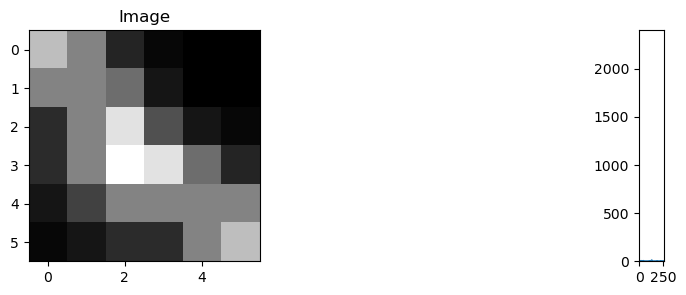

In [30]:
resized_img.shape
histGrayScale(resized_img)
imshow(resized_img, cmap=plt.get_cmap('gray'))

Vous avez sans doute remarqué que nous avons dorénavant des nombres décimaux dans la matrice (donc des niveaux de gris). Celà est en fait dû à l’agrandissement. Repassons en pur noir et blanc pour avoir notre véritable agrandissement. Pour celà nous allons convertir les valeurs > 0,5 en 1 et les autres en zéro:

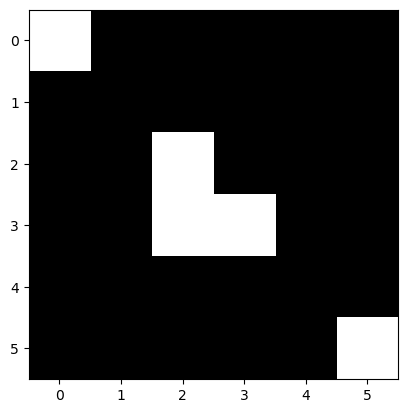

In [31]:
intresized = resized_img > 0.5
imshow(intresized.astype('int32'), cmap=plt.get_cmap('gray'))

On voit mieux maintenant notre étirement d’image avec la forme du milieu et celle du haut à gauche.

# Changement d’échelle
Pour changer le grossissement d’une image on pourra utiliser transform.rescale(). Ci-dessous nous utilisons un ratio de 1/2:

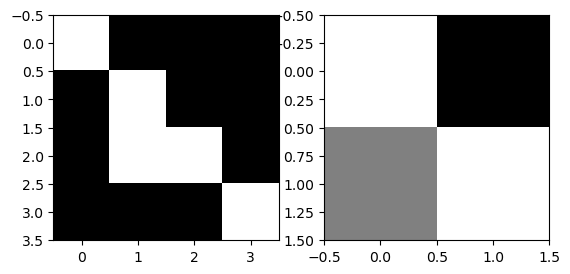

In [32]:
image_rescaled = transform.rescale(image=image_test, scale=1.0 / 2.0, anti_aliasing=False, preserve_range=True)
_, axes = plt.subplots(ncols=2)
axes[0].imshow(image_test, cmap=plt.get_cmap('gray'))
axes[1].imshow(image_rescaled, cmap=plt.get_cmap('gray'))

# Transformations euclidiennes
La librairie scikit-image permet d’effectuer vraiment un grand nombre de transformations sur des images. Je trouve la transformation SimilarityTransform() particulièrement utile car elle permet de combiner des transformations euclidiennes (translations) avec du changement d’echelle.

Prenons une image normale cette fois-ci, l’image n’est pas droite et nous allons la redresser, puis la décaler directement avec cette fonction

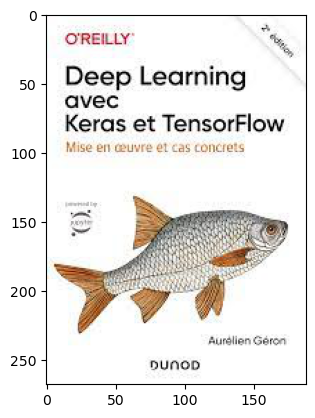

In [33]:
image = imread('book.jpg')
imshow(image)

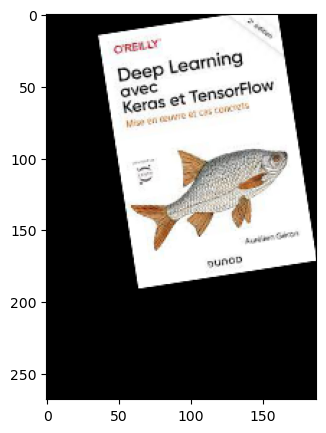

In [34]:
tr = transform.SimilarityTransform(scale=1.5, rotation=math.pi/20, translation=(-50, -30))
plt.figure(figsize=(8, 5))
image_tr_1 = transform.warp(image, tr)
plt.imshow(image_tr_1)

En fait la rotation de l’image créé un décalage que nous corrigeons avec le parametre translation ci-dessus.
Voici qui cloture cet article sur les transformations de bases d’image. Nous allons dans les prochains articles aborder les filtres et notament ceux de convolution qui nous permettrons de mieux comprendre comment les réseaux de neurones dit convolutifs sont devenus aussi omniprésents dans le monde du traitement de l’image.

# Traitement d’images (partie 5: Transformations morphologiques)

Dans le précédent chapitre de la série sur le traitement des images nous avons vu quelques transformations basiques d’images comme la rotation ou autres translations. Nous allons voir dans cet article un autre type de transformation (dit « morphologique ») qui peut aussi être considéré comme des filtres. C’est une excellente transition en fait vers le chapitre suivant qui sera dédié, lui aux filtres et plus particulièrement au mécanisme de convolution.

Nous verrons donc dans cet article les principes d’érosion et de dilatation d’images qui sont très utilisés notamment lors de la restauration d’images de mauvaise qualité.

# Principe
Les transformations dites morphologiques se basent en fait sur l’application d’un gabarit (ou élément structurant) que l’on va superposer sur chaque pixel de l’image. L’idée est donc très simple, il faut une image (l’image à transformer bien sur), un gabarit (qui est lui aussi une matrice bien sur) qui peut avoir plusieurs formes (étoile, rectangle, etc.) et c’est comme si nous allions utiliser ce gabarit comme un tampon sur l’image que l’on souhaite modifier.

On peut considérer cette opération comme une transformations ou comme un filtre. En effet, la littérature mentionne les deux terminologies, et finalement comme je le disais en introduction cette opération se situe en fait entre les deux concepts.

Voyons comment ces transformations morphologiques fonctionnent avec les deux principales : l’érosion et la dilatation. En réailté il y a 4 grandes opérations morphologiques , à savoir la dilatation, l’érosion, l’ouverture et la fermeture, dans leur version pour les images en niveau de gris (on ne traite pas ici les images couleurs). Néanmoins en ce qui concerne l’ouverture et la fermeture on verra qu’elles dépendent des deux premières dont nous allons détailler le principe ici.

# Les gabarits (ou éléments structurants)
Pour effectuer ces transformations on a besoin d’un gabarit qui va en fait nous permettre de servir en quelque sorte d’empreinte sur l’image source. Pour cela nous utiliserons la librairie scikit-image qui va gérer ces transformations morphologiques sans effort. En effet cette librairie propose en standard déjà un certain nombre de gabarits de plusieurs formes (étoile, carré, etc.).

Regardons ici un gabarit tout simple en forme de disque (bon ok sur 3×3 pixels on dirait plutot une croix):

https://scikit-image.org/docs/dev/api/skimage.morphology.html

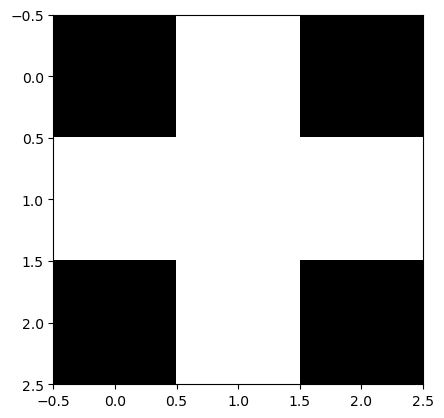

In [35]:
imshow(morphology.disk(1), cmap=get_cmap('gray'))

Comme je l’ai expliqué plus haut nous appliquerons ce gabarit sur chaque pixel de l’image cible. En fait nous balayerons chaque pixel et on regardera le résultat de la superposition des pixels de ce gabarit par rapport à l’image.

# Dilatation
Commençons par la dilatation (qui correspond à un OU logique sur une image binaire). Pour le coup je trouve que cette transformation porte plutôt bien son nom. En effet, la dilatation permet d’élargir une image. La hauteur et largeur de cette image est donc dilatée seront les sommes des hauteurs et largeurs de l’image originale et du gabarit. Quand nous appliquerons un gabarit sur l’image, on centrera ce gabarit sur chaque pixel et Si le pixel est égal à 1 on fera une empreinte du gabarit sur l’image (centré sur le pixel).

Voyons avec Python comment procéder afin de mieux comprendre le mécanisme avec une image très simple (avec seulement 2 pixels à 1):

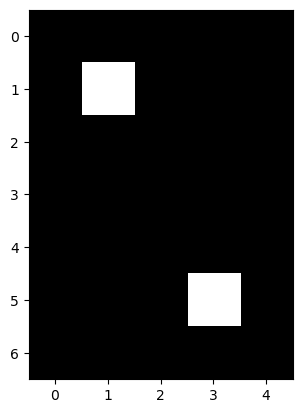

In [36]:
image_test = np.array([[0,0,0,0,0], 
                       [0,1,0,0,0], 
                       [0,0,0,0,0], 
                       [0,0,0,0,0], 
                       [0,0,0,0,0], 
                       [0,0,0,1,0], 
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

Appliquons la dilatation avec le gabarit précédent avec la fonction morphology.binary_dilation



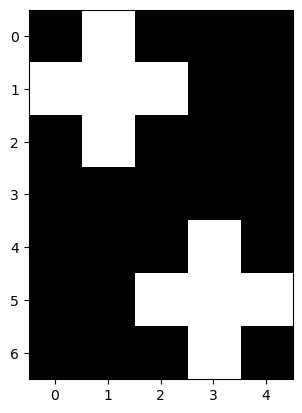

In [37]:
dilation = morphology.binary_dilation(image_test, disk(1))
imshow(dilation, cmap=get_cmap('gray'))

Remarquez dans l’image dilatée l’empreinte des deux pixels originaux avec celle du gabarit. On voit ici deux croix (correspondantes au gabarit) qui sont donc centrées sur les deux pixels originaux que nous avions. On utilise souvent la dilatation pour reconstituer des formes qui sont découpées.

# L’érosion
Si vous avez compris le principe de la dilatation, l’érosion n’est guère plus complexe … car c’est tout simplement l’inverse (un ET logique sur une image binaire). Dans le cas de l’érosion on place le gabarit sur chaque pixel. Puis on met le pixel à 1 si tous les pixels du gabarit placé sont 1. Le résultat est donc une réduction de l’image.

Regardons tout de suite un autre exemple:

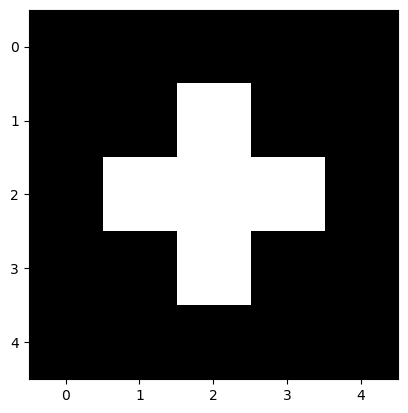

In [38]:
image_test = np.array([[0,0,0,0,0], 
                       [0,0,1,0,0], 
                       [0,1,1,1,0], 
                       [0,0,1,0,0], 
                       [0,0,0,0,0]])
imshow(image_test, cmap=get_cmap('gray'))

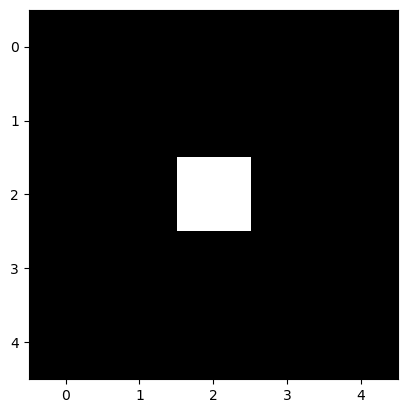

In [39]:
erosion = morphology.binary_erosion(image_test, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

Dans cet exemple simple on voit bien que la seule possibilité pour que tous les pixels du gabarit soient à 1 c’est quand celui là même est centré sur la croix. On utilise souvent l’érosion pour séparer des objets qui sont collés sur une image.

# Ouverture & Fermeture
Sans aller dans le détail :

L’ouverture c’est la composition de l’érosion par un gabarit suivie de la dilatation par ce même gabarit.
La fermerture c’est la composition de la dilatation par un gabarit suivie de l’érosion par ce même gabarit.
# Exemples concrêts
Regardons avec une image ce que cela donne pour l’érosion:

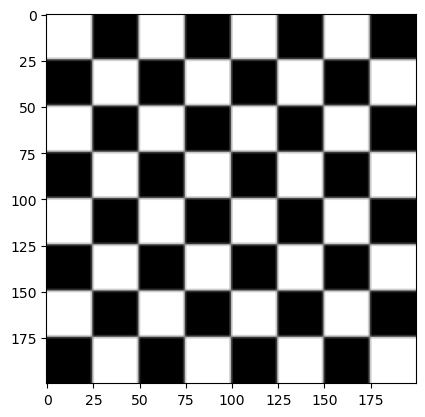

In [40]:
img =  data.checkerboard()
imshow(img, cmap=get_cmap('gray'))

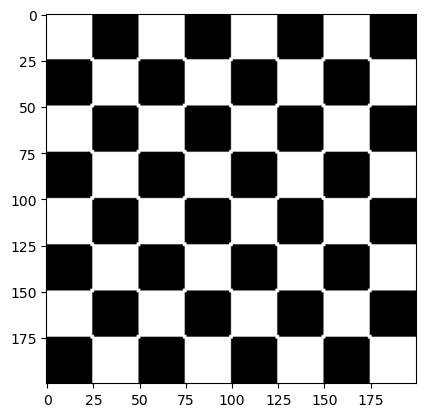

In [41]:
erosion = morphology.binary_erosion(img, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

Le résultat n’est pas super visible, il faut regarder de près pour voir la différence. Alors pour mieux voir les effets, on va effectuer plusieurs fois de suite cette transformation et regarder le résultat :

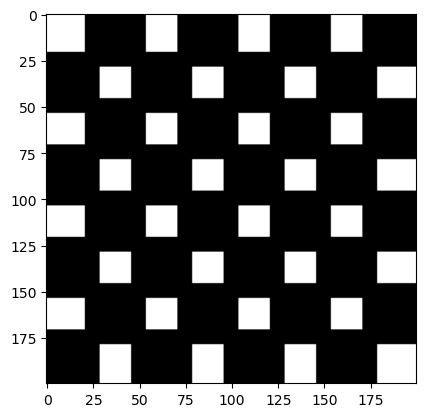

In [42]:
erosion =  data.checkerboard() 
for i in range(5):
  erosion = morphology.binary_erosion(erosion, morphology.disk(1))
imshow(erosion, cmap=get_cmap('gray'))

On voit bien mieux avec ce résultat que les pixels noirs prennent de plus en plus plus d’espace.

Voici donc pour les transformations morphologiques, dans le prochain article on abordera les filtres de convolution et leurs applications.

# Traitement d’images (partie 6: Filtres & Convolution)

Dans le précédent chapitre nous avons fait sans le savoir un premier pas vers les filtres. Ce principe de la petite fenêtre glissante nous allons le généraliser mais surtout aller plus loin en y ajoutant des opérations sur les valeurs de pixel. Nous allons donc aborder dans cet article une famille de filtre très utilisée par tous les logiciels de retouches (comme Photoshop ou Gimp). En fait et pour aller plus loin (sans non plus pour autant « sploiler » les articles suivants) ce principe de convolution va aussi être très utilisés par les réseaux de neurones (Deep Learning) … mais nous verrons cela plus tard. Focalisons nous tout d’abord sur le principe de filtre et plus précisément de convolution.

# Principe de convolution
Comme je l’ai précisé en introduction nous allons garder le principe de la fenêtre glissante qui va donc parcourir toute l’image de haut en bas et de gauche à droite (même si en réalité l’ordre et le sens n’ont pas d’importance, mais c’est plus simple à visualiser pour la compréhension). Cette fenêtre glissante s’appelle le kernel (on voit bien ici la racine mathématique du concept). On trouve aussi les terminologies de noyau de convolution ou même de masque de convolution.

# Etape N°1
Le principe est donc très simple. On superpose le kernel sur le coin gauche de la matrice de l’image, comme ci-dessous. Pour information le kernel est la matrice avec des seules valeurs 0,5 dans l’illustration ci-dessous. Ensuite nous allons multiplier chaque nombre superposé puis additionner le tout. Le résultat prendra sa place naturellement comme cela est montré dans la figure.

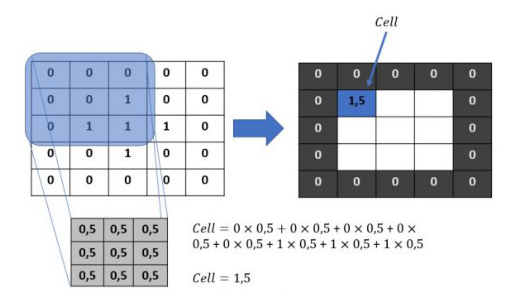

In [43]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('Filtre&Convolutin.jpg') 
ax.imshow(i)

Notre premier pixel est donc recalculé, on peut passer au suivant. Pour ce faire on déplace juste le kernel d’un rang. Puis on refait exactement la même opération.

# Etapes suivantes

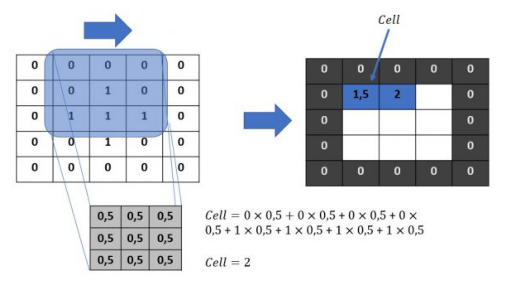

In [44]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('Filtre&Convultion_Etape_suivante.jpg') 
ax.imshow(i)

On effectue cela bien sur pour tous les pixels de l’image à filtrer. On doit obtenir par ce procédé simple une nouvelle image (matrice) filtrée. Ce procédé est vraiment efficace d’une part et de plus très peu couteux pour la machine car seules des additions & multiplications sont effectuées. Nous venons de faire ce que l’on appelle un produit de convolution. Cette opération est de plus une application bilinéaire, associative et commutative.

Une petit détail demeure quand même! Avez-vous remarqué qu’il était impossible de calculer les pixels du bord ?

Heureusement les bords ne comprennent que rarement des pixels importants, et puis ils sont peu nombreux par rapport au reste de l’image. Il existe plusieurs stratégies donc pour remplir ces bords. On peut simplement les laisser à zéro, répliquer les valeurs à coté, calculer une moyenne des pixels alentours, etc.

Si vous avez compris le principe, vous allez maintenant en voir l’intérêt. En fait la clé du filtrage se trouve dans la création du noyau. Heureusement les mathématiciens ont déjà travaillé pour nous en fournissant des noyaux tout fait pour effectuer bon nombre d’opérations de filtrage. Nous allons en passer quelques uns en revue.

Pour mieux se familiariser avec ce concept (si quelqu’un à encore un doute), allez sur ce site https://setosa.io/ev/image-kernels/ vous pourrez jouer avec les filtres et voir directement les résultats.

# Convolution avec Python
Nous n’allons pas utiliser de librairies toutes faites comme il en existe. Afin d’illustrer le principe que nous voyons de voir nous allons directement jouer avec les matrices/pixels. Nous utiliserons donc la librairie SciPy pour les opérations matricielles de convolution.

Commençons par importer quelques librairies et ajoutons une petite fonction de visualisation:

In [45]:
def displayTwoBaWImages(img1, img2):
  _, axes = plt.subplots(ncols=2)
  axes[0].imshow(img1, cmap=plt.get_cmap('gray'))
  axes[1].imshow(img2, cmap=plt.get_cmap('gray'))

Créons maintenant une image toute simple en noir et blanc:

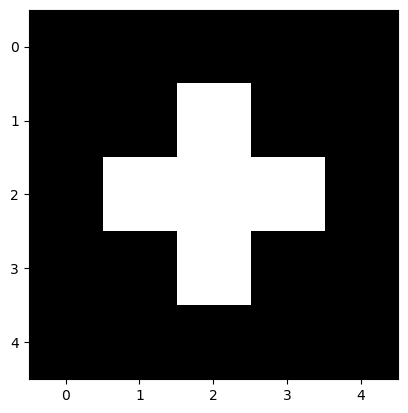

In [46]:
image_test = np.array([[0,0,0,0,0], 
                       [0,0,1,0,0], 
                       [0,1,1,1,0], 
                       [0,0,1,0,0], 
                       [0,0,0,0,0]])
imshow(image_test, 
       cmap=get_cmap('gray'))

Créons un noyau de convolution très simple

np.ones((3,3), np.float32) : Cette partie du code crée un tableau numpy (np) de dimension 3x3 rempli de valeurs égales à 1. np.float32 spécifie le type de données des éléments du tableau, dans ce cas, des nombres flottants 32 bits.

/2 : Après la création du tableau, chaque élément est divisé par 2. Cela donne un tableau de 3x3 avec des valeurs égales à 0.5 (1/2)

In [47]:
kernel = np.ones((3,3), np.float32)/2

Demandons à Scipy de faire le produit de convolution

imgconvol = signal.convolve2d(image_test, kernel, mode='same', boundary='fill', fillvalue=0) : Cette ligne de code réalise la convolution bidimensionnelle. Voici ce que chaque argument signifie :

- image_test : L'image d'origine sur laquelle vous souhaitez appliquer la convolution.

- kernel : Le noyau de convolution que vous avez défini précédemment (un noyau de moyennage de 3x3).

- mode='same' : Le mode de sortie de la convolution. Le mode 'same' signifie que la sortie aura la même taille que l'image d'origine en ajustant les bords.

- boundary='fill' : Gestion des bords. La valeur 'fill' signifie que les valeurs hors du bord de l'image sont remplies avec une valeur spécifiée.

- fillvalue=0 : La valeur spécifiée pour remplir les bords, dans ce cas, 0.

- displayTwoBaWImages(image_test, imgconvol) : Cette ligne appelle une fonction displayTwoBaWImages (qui n'est pas fournie dans votre code), qui est probablement utilisée pour afficher les images en noir et blanc d'origine (image_test) et l'image résultante après la convolution (imgconvol).

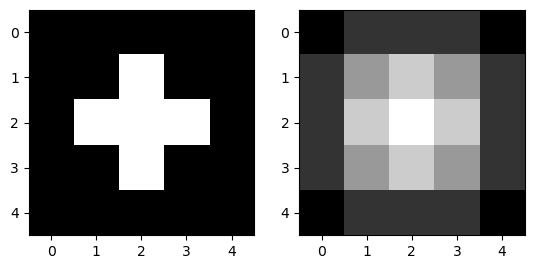

In [48]:
imgconvol = signal.convolve2d(image_test, 
                              kernel, 
                              mode='same',
                              boundary='fill', 
                              fillvalue=0)
displayTwoBaWImages(image_test, imgconvol)

Si on regarde l’image (sa matrice) :

In [49]:
imgconvol

array([[0. , 0.5, 0.5, 0.5, 0. ],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0.5, 2. , 2.5, 2. , 0.5],
       [0.5, 1.5, 2. , 1.5, 0.5],
       [0. , 0.5, 0.5, 0.5, 0. ]])

Ce filtre a en quelque sorte créé un flou sur l’image de base comme on peut le voir.

Voyons d’autres filtres maintenant.
# Détection de contours
Le noyau de convolution qui permet de détecter les contours est une matrice 3×3 toute simple :


Le tableau kernel_contour que vous avez fourni représente un noyau (ou masque) utilisé pour détecter les contours dans une image via une opération de convolution. Ce type de noyau est souvent utilisé dans le domaine du traitement d'images pour mettre en évidence les variations rapides d'intensité lumineuse, ce qui est caractéristique des contours.

Explication des valeurs du noyau :


- Première ligne [0, 1, 0] : Cette ligne est souvent appelée "noyau de détection de contour vertical". Il met davantage l'accent sur les variations d'intensité verticales dans l'image. La valeur 1 au centre du noyau indique un poids plus élevé pour le pixel central, et les valeurs 0 sur les côtés indiquent que les pixels voisins ne contribuent pas à la détection de contour vertical.


- Deuxième ligne [1, -4, 1] : Cette ligne représente un noyau qui met en évidence les variations d'intensité dans toutes les directions, mais avec une emphase particulière sur le pixel central. Les valeurs 1 et -4 donnent une pondération plus élevée au pixel central, tandis que les valeurs 1 des côtés indiquent une pondération plus faible.


- Troisième ligne [0, 1, 0] : Similaire à la première ligne, cela complète le noyau de détection de contour vertical.


En résumé, ce noyau est conçu pour accentuer les changements brusques d'intensité dans une image, ce qui peut révéler des contours. Lorsqu'il est utilisé avec une opération de convolution sur une image, ce noyau va produire une nouvelle image dans laquelle les contours seront mis en évidence. Les valeurs spécifiques du noyau ont été choisies pour atteindre cet objectif.

In [50]:
kernel_contour = np.array([[0,1,0], 
                       [1,-4,1], 
                       [0,1,0]])

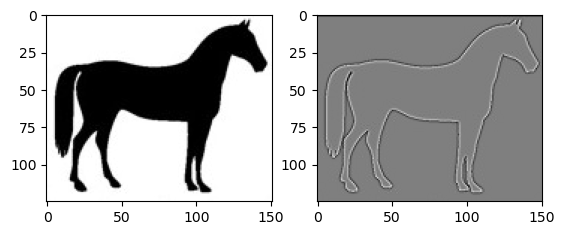

In [51]:

image = imread('cheval_copie.jpg', as_gray=True)
imgconvol = signal.convolve2d(image, 
                              kernel_contour, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(image, imgconvol)
imshow(imgconvol, cmap=get_cmap('gray'))

Résultant plutôt bluffant n’est-ce pas ?

# Augmentation de contraste
Le noyau de convolution est maintenant une matrice 5×5:

In [52]:
kernel_inccontrast = np.array([[0,0,0,0,0], 
                               [0,0,-1,0,0], 
                               [0,-1,5,-1,0], 
                               [0,0,-1,0,0], 
                               [0,0,0,0,0]])

In [53]:
kernel_inccontrast

array([[ 0,  0,  0,  0,  0],
       [ 0,  0, -1,  0,  0],
       [ 0, -1,  5, -1,  0],
       [ 0,  0, -1,  0,  0],
       [ 0,  0,  0,  0,  0]])

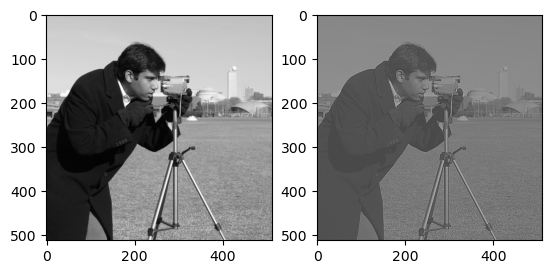

In [54]:
imgcontrast = signal.convolve2d(data.camera(), 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(data.camera(), imgcontrast)

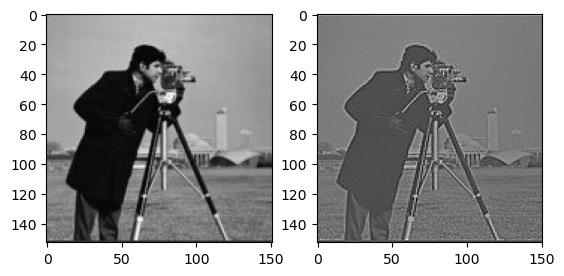

In [55]:
image = imread('photograph_copie.jpg', as_gray=True)
imgcontrast = signal.convolve2d(image, 
                              kernel_inccontrast, 
                              boundary='symm', 
                              mode='same')
displayTwoBaWImages(image, imgcontrast)

# Flouttage

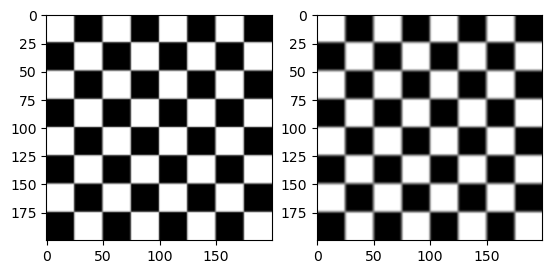

In [56]:
kernel = np.array([[0,0,0,0,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,1,1,1,0], 
                    [0,0,0,0,0]])
img = signal.convolve2d(data.checkerboard(), 
                        kernel, 
                        boundary='symm', 
                        mode='same')
displayTwoBaWImages(data.checkerboard(), img)

# Renforcement de bords

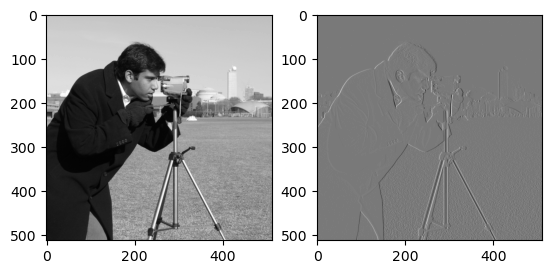

In [57]:
kernel = np.array([[0,0,0], 
                   [-1,1,0,], 
                   [0,0,0,]])
img = signal.convolve2d(data.camera(), 
                        kernel, 
                        boundary='symm', 
                        mode='same')
displayTwoBaWImages(data.camera(), img)

# Conclusion
Il existe bon nombre de noyaux de convolution déjà fournis et qui permettent comme nous venons de le voir d’effectuer des opérations sur les images. Nous verrons dans un prochain article comment les réseaux de neurones à convolution vont trouver et combiner des filtres de convolution pour détecter des formes plus complexes.

# Traitement d’images (partie 7: Les Réseaux de neurones à convolution – CNN)

Nous voici donc arrivé à la fin de cette série sur le traitement d’image. Et comment mieux terminer une série comme celle-ci qu’en ouvrant sur un autre monde … celui des réseaux de neurones. Bien entendu impossible de traiter en 1 seul article les réseaux de neurones, et encore moins dans le détails les réseaux de neurones à convolution (ou CNN). Néanmoins, je vais essayer de vous initier à cette technique que l’on retrouve (sans toujours le savoir) un peu partout dés lors que l’on traite des images.

Cet article est la suite logique de l’article précédent et par du principe que vous avez de bonnes notions sur les Réseaux de Neurones Artificiels (ANN). Si ce n’est pas le cas, vous pouvez aussi lire cet article (tutoriel) que j’avais écris sur le Titanic. Bien sur d’autres articles spécifiques aux Réseaux de neurones, ne vont pas tarder à apparaitre sur ce site 😉

https://datacorner.fr/keras-titanic/?_ga=2.182887654.1980716635.1704996363-1926476272.1704996363&_gl=1*gbqrle*_ga*MTkyNjQ3NjI3Mi4xNzA0OTk2MzYz*_ga_RXP3T9KBWC*MTcwNTEwMDYzOS42LjAuMTcwNTEwMDYzOS4wLjAuMA..

# Qu’est-ce qu’un CNN ?
Très simplement un CNN (ou Réseau de Neurones à Convolution) est un réseau de neurones artificiel qui possède au moins une couche de convolution. Une couche de convolution étant tout simplement une couche dans laquelle on va appliquer un certain nombre de filtres à convolution.

Ok, mais, pourquoi appliquer des filtres à convolution ?

Tout simplement parce qu’une image contient beaucoup, mais alors beaucoup de données en entrée. Imaginez avec une petite image de 100×100 pixels en couleurs … delà nous fait déjà 100x100x3 donc 30 000 données à envoyer dans le réseau de neurones (et c’est une petite image!). Si vous commencez à empiler couches et neurones, très vite le nombre de paramètres de votre réseau va exploser et le nombre de calculs va croitre de manière exponentielle … de quoi mettre par terre votre machine !

Il fallait donc trouver une autre approche que celle classique des réseaux ANN (ou Perceptron Multicouches). L’idée derrière les filtres a convolution est qu’ils permettent de trouver des patterns, des formes dans les images (rappelez vous l’article précédent qui permettait de trouver les contours par exemple). Les CNN permettent en effet de déterminer de manière progressive les différentes formes puis de les assembler pour en trouver d’autres.

L’exemple classique est que les premières couches d’un tel réseau trouve les formes de base d’un visage: les traits principaux, puis on va détecteur les premières formes: nez, bouche, yeux, etc., puis pour finir le visage et pourquoi pas reconnaître la personne, etc.

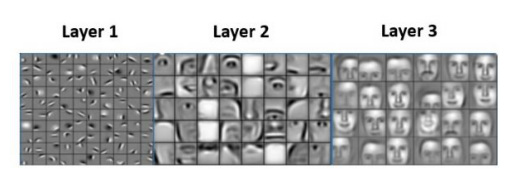

In [58]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('cnn_2.jpg') 
ax.imshow(i)

Les principaux avantages des filtres à convolution sont:

Le nombre de paramètres est beaucoup plus petit à trouver comparé à une approche de type ANN. En le réseau de neurones n’aura qu’à trouver les valeurs de la matrice de convolution (kernel) c’est à dire une petite matrice du type 2×2 ou 3×3!
Les calculs sont extrêmement simples car une convolution ne demande que des multiplications et additions.
Un Réseau de Neurones à Convolution (ou CNN) n’est finalement qu’un réseaux de neurones qui va détecter progressivement les caractéristiques d’une image.

# Les couches de convolution du CNN
L’architecture d’un tel réseau s’articule très souvent par un empilement de couches convolutives puis de couches denses profondes qui feront le travail de décision. Pour résumer les couches convolutives trouvent les formes et patterns dans l’image et les couches finales effectueront le travail de décision (comme une classification par exemple).

Les couches de convolution comprennent plusieurs filtres. Chaque Filtre de convolution – comme nous l’avons expliqué précédemment – le la même couche va donc extraire ou détecter une caractéristique de l’image. Ainsi à la sortie d’une couche de convolution on a un ensemble de caractéristiques qui sont matérialisées par ce que l’on appelle des features Maps.

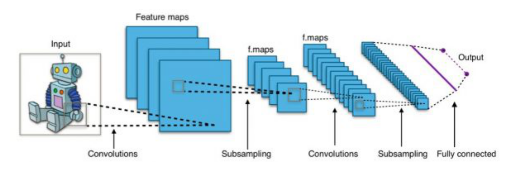

In [59]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('Typical_cnn.jpg') 
ax.imshow(i)

Ces caractéristiques (ou images résultantes de filtres à convolution) sont ensuite renvoyées dans d’autres filtres, etc.

Construisons notre CNN avec Tensorflow
Objectif
Pour illustrer les réseaux de neurones convolutif, nous allons créer à partir de zéro le notre qui va nous permettre de classifier des images. Pour ce faire nous utiliserons Python & TensorFlow 2.x (avec keras) et nous allons utiliser un jeu de données classique le MNSIT Fashion.

# Description des données
Le jeu de données contient plus de 70000 images en niveau de gris (Cf. ci-dessous):

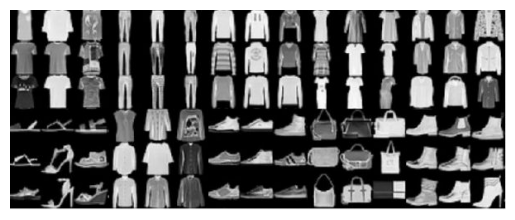

In [60]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('cnn_3.jpg') 
ax.imshow(i)

Chaque image est un carré de 28×28 pixels.

Bonne nouvelle, Tensorflow inclut ses images dans son API donc pas besoin de se fatiguer à récupérer le jeu de données. Pour vous simplifier la vie je vous suggère d’utiliser colab (le notebook sera téléchargeable sur GitHub bien sur).

Ce jeu de données permet d’identifier 10 types d’objets (étiquettes). Ces étiquettes sont codifiées avec des nombres de 0 à 9:

0. T-shirt/haut
1. Pantalon
2. Pullover
3. Robe
4. Manteau
5. Sandale
6. Chemise
7. Sneaker
8. Sac
9. Bottine

Récupération du jeu de données
Commençons par importer les librairies:

In [61]:
#!pip install tensorflow
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Conv2D, Input, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Model
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns

La récupération du jeu de données ainsi que le découpage se fait très simplement :

In [62]:
dataset_fashion_mnsit = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = dataset_fashion_mnsit.load_data()

Maintenant nous avons deux jeux de données (entraînement et test). Regardons la répartition des étiquettes :

In [63]:
pd.DataFrame(y_train)[0].value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: 0, dtype: int64

Excellente nouvelle nous avons une répartition très homogène de ces étiquettes.

# Préparation des données
Les réseaux de neurones sont très sensibles à la normalisation des données. Dans le cas d’images en niveau de gris c’est très simple et comme les pixels vont de 0 à 255, nous n’avons qu’à diviser tous les pixels par 255:

In [64]:
X_train = X_train / 255
X_test = X_test / 255
print(f"Données entrainement: {X_train.shape}, Test: {X_test.shape}")

Données entrainement: (60000, 28, 28), Test: (10000, 28, 28)


Regardons une image:

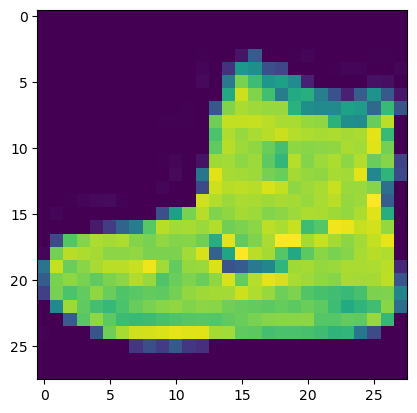

In [65]:
plt.imshow(X_train[0])

Et son étiquette:

In [66]:
y_train[0]

9

9 correspond bien à une botine.

Etant donné que l’on a des images en niveau de gris il nous manque une dimension (couleur : RVB). Rien de grave nous allons l’ajouter …

In [67]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

# Création du Modèle (réseau de neurones)
Je ne vais pas tout détailler ici, mais on va empiler les couches de notre CNN comme suit :

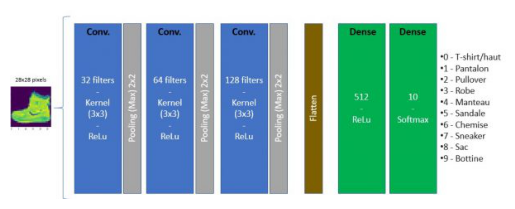

In [68]:
_, ax = plt.subplots()
ax.set_axis_off()
i = imread('cnn_4.jpg') 
ax.imshow(i)

En Python avec TensorFlow cela donne :

In [72]:
mon_cnn = tf.keras.Sequential()

# 3 couches de convolution, avec Nb filtres progressif 32, 64 puis 128
mon_cnn.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

mon_cnn.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
mon_cnn.add(MaxPooling2D(pool_size=(2, 2)))

# remise à plat
mon_cnn.add(Flatten())

# Couche dense classique ANN
mon_cnn.add(Dense(512, activation='relu'))

# Couche de sortie (classes de 0 à 9)
mon_cnn.add(Dense(10, activation='softmax'))

Note: l’explication sur les différents hypermarametres et couches (Conv2D et pooling notamment) viendra dans un article ultérieur.

Afin de ne pas tâtonner sur le nombre d’epochs à réaliser, je vais utiliser la technique de l’earlyStopping qui permet d’arrêter l’apprentissage dés lors que le modèle commence à faire du sur-apprentissage. Celà me permet de négliger ce parametre (epochs).

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

Compilons le modèle:

In [74]:
mon_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
mon_cnn.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 1, 64)        

On constate que notre modèle va devoir apprendre 94 154 paramètres, cela va donc prendre quelques minutes lors de la phase d’entrainement.

# Entrainement
Lançons l’entrainement. Remarquez le nombre d’epochs (itérations / rétro-propagation) de 25:

In [75]:
mon_cnn.fit(x=X_train, 
            y=y_train, 
            validation_data=(X_test, y_test), 
            epochs=25,
            callbacks=[early_stop])

Epoch 1/25


1875/1875 [==============================] - 33s 16ms/step - loss: 0.5785 - accuracy: 0.7861 - val_loss: 0.4330 - val_accuracy: 0.8423
Epoch 2/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3892 - accuracy: 0.8549 - val_loss: 0.3673 - val_accuracy: 0.8671
Epoch 3/25
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3319 - accuracy: 0.8764 - val_loss: 0.3902 - val_accuracy: 0.8523
Epoch 4/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2965 - accuracy: 0.8896 - val_loss: 0.3362 - val_accuracy: 0.8793
Epoch 5/25
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2683 - accuracy: 0.9008 - val_loss: 0.3233 - val_accuracy: 0.8824
Epoch 6/25
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2475 - accuracy: 0.9069 - val_loss: 0.3072 - val_accuracy: 0.8901
Epoch 7/25
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2309 - accuracy: 0.9125 - val_loss: 0.3204

La condition d’earlystopping permet l’arrêt avant les 25 itérations (arrêt au bout de 11).

# Evaluation du modèle
TensorFlow a mis de coté les informations de précision et perte lors de la phase d’entrainement et pour chaque epochs. Il nous suffit de les récupérer:

<Axes: >

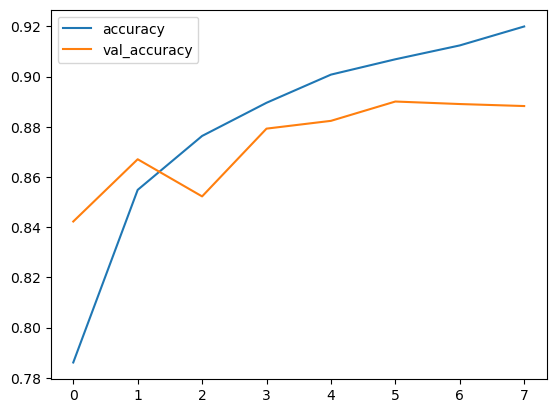

In [76]:
losses = pd.DataFrame(mon_cnn.history.history)
losses[['accuracy', 'val_accuracy']].plot()

La courbe bleue représente la précision sur les données d’entrainement, l’orange la précision sur les données de test. On remarque d’ailleurs que même si la précision continue de progresser sur les données d’entrainement alors que la précision sur les données de test s’aplatit pour même diminuer. On commence alors à sur-apprendre (over-fitting), c’est pour celà que l’early-stopping à arrêté le processus.

On peut aussi voir la courbe de perte :

<Axes: >

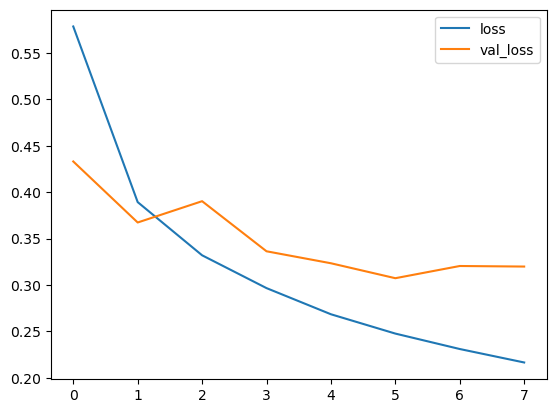

In [77]:
losses[['loss', 'val_loss']].plot()

Regardons la matrice de confusion (avec une carte de chaleur avec Seaborn):

313/313 [==============================] - 2s 5ms/step


<Axes: >

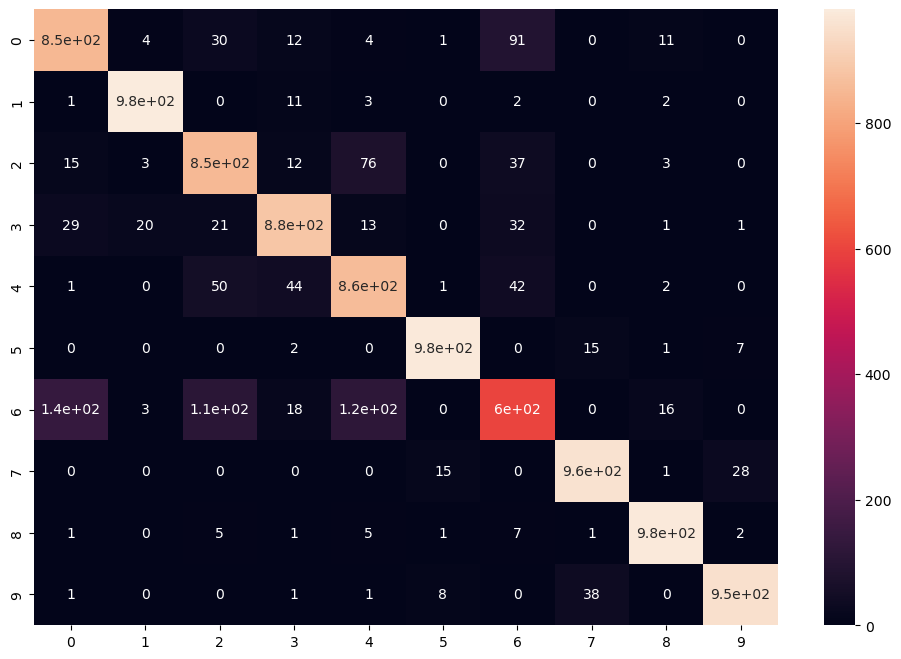

In [80]:
plt.figure(figsize=(12,8))
# Prédire les classes (indices) au lieu des probabilités continues
pred_classes = np.argmax(mon_cnn.predict(X_test), axis=1)
sns.heatmap(confusion_matrix(y_test, pred_classes),annot=True)

On constate qu’il y a des erreurs/confusion surtout entre les chemises (6) et hauts (0), Ce qui n’est pas vraiment étonnant vu la qualité des images.

# Prédiction
Essayons notre modèle sur une image. Pour cet essai nous prendrons l’image du début et regardons comment se comporte notre modèle:

In [82]:
img = X_train[0]
mon_cnn.predict(img.reshape(1,28,28,1))

1/1 [==============================] - 0s 103ms/step


array([[2.4397526e-08, 5.2020090e-09, 6.5421210e-11, 2.0827540e-09,
        7.8610979e-10, 1.1650927e-05, 2.5716227e-09, 6.9755558e-03,
        3.0488565e-08, 9.9301285e-01]], dtype=float32)

Le tableau renvoyé propose en fait une probabilité de résultat pour chaque classe … Pour avoir la plus probable, il suffit de prendre la plus grande valeur :

In [83]:
np.argmax(mon_cnn.predict(img.reshape(1,28,28,1)), axis=-1)[0]

1/1 [==============================] - 0s 36ms/step


9

C:\Users\maiss\AppData\Local\Temp\ipykernel_12168\3239082776.py:20: DeprecationWarning: Please use `binary_dilation` from the `scipy.ndimage` namespace, the `scipy.ndimage.morphology` namespace is deprecated.
  dilated_image = morphology.binary_dilation(binary_image, structure=kernel)


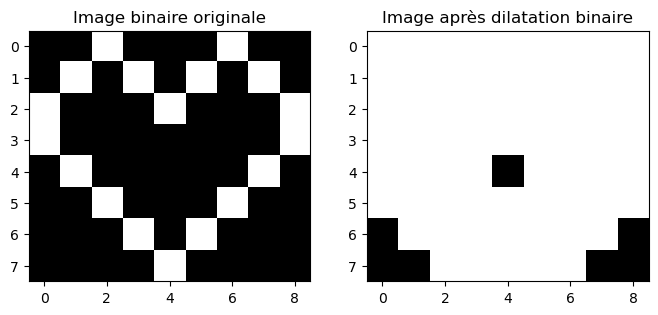

In [69]:
import numpy as np
from scipy.ndimage import morphology
import matplotlib.pyplot as plt
# Création d'une image binaire de démonstration
binary_image = np.array([[0, 0, 1, 0, 0, 0, 1, 0, 0],
                         [0, 1, 0, 1, 0, 1, 0, 1, 0],
                         [1, 0, 0, 0, 1, 0, 0, 0, 1],
                         [1, 0, 0, 0, 0, 0, 0, 0, 1],
                         [0, 1, 0, 0, 0, 0, 0, 1, 0],
                         [0, 0, 1, 0, 0, 0, 1, 0, 0],
                         [0, 0, 0, 1, 0, 1, 0, 0, 0],
                         [0, 0, 0, 0, 1, 0, 0, 0, 0]])

# Définition du noyau de dilatation (élément structurant)
kernel = np.array([[1, 1, 1],
                   [1, 1, 1],
                   [1, 1, 1]])

# Application de la dilatation binaire
dilated_image = morphology.binary_dilation(binary_image, structure=kernel)

# Affichage des images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Image binaire originale')
plt.imshow(binary_image, cmap='gray', interpolation='nearest')

plt.subplot(1, 2, 2)
plt.title('Image après dilatation binaire')
plt.imshow(dilated_image, cmap='gray', interpolation='nearest')

plt.show()

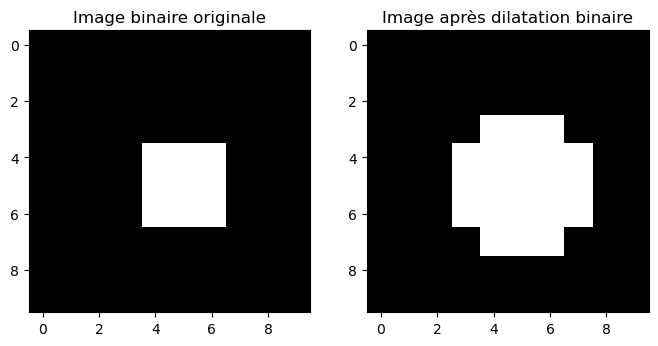

In [70]:
import numpy as np
from skimage.morphology import binary_dilation, disk
import matplotlib.pyplot as plt

# Création d'une image binaire de démonstration
image_test = np.zeros((10, 10))
image_test[4:7, 4:7] = 1

# Application de la dilatation binaire avec un élément structurant circulaire
dilation = binary_dilation(image_test, disk(1))

# Affichage des images
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.title('Image binaire originale')
plt.imshow(image_test, cmap='gray', interpolation='nearest')

plt.subplot(1, 2, 2)
plt.title('Image après dilatation binaire')
plt.imshow(dilation, cmap='gray', interpolation='nearest')

plt.show()
